# **Background information:** 

Welcome to the coding challenging! This will be a 3-part challenge and you will develop an image processing and computer vision techniques to analyze the health of Solar photovoltaic (PV) systems. The challenege will be judged based on these  three results.

**(a)**Bench marking classification results that can be shared broadly with the community. 


**(b)**Algorithm optimization towards real-time classification that can be used by low performance edge-computing devices.

## **Bonus**
**(c)** Incorporation of more classes and the ability to recognize anomalies that are outside of the 12 classes of InfraredSolarModules.


We will be focusing on Solar photovoltaic (PV) datasets. Here's something we'd like you to know before you start:

We would like you to pre-process, visualize, perform an exploratory data analysis. Correlation analysis and anything you can think of are welcomed.




If you have any questions, feel free to reach out to **@Tannistha** :)

## **Data downloads and requirements**:

We will use datasets from:
https://github.com/RaptorMaps/InfraredSolarModules


You are encouraged to use Python and its libraries for this challenge. For evaluation, we recommend numpy, pandas, matplotlib and seaborn for part a and Keras or PyTorch for part b. Please submit your work as one single .ipynb (recommended) or .py file.
Please attach your model file that has weight (pkl) and a explain how to use it with new dataset.

### Link to previous work is available on 

*   InfraRed Thermography:

https://www.mdpi.com/1424-8220/20/4/1055

https://www.mdpi.com/1424-8220/20/4/1055
*   Other relevant links



http://arxiv.org/abs/1807.02894

https://ai4earthscience.github.io/iclr-2020-workshop/papers/ai4earth22.pdf

https://onlinelibrary.wiley.com/doi/abs/10.1002/pip.3191

https://www.sciencedirect.com/science/article/abs/pii/S0038092X20308665


### **Prepare Data** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import json
import os
import random
import tensorflow as tf

In [2]:
os.listdir('./')

['app.ipynb',
 'holdout_set.docx',
 'Data_exploration.ipynb',
 '.ipynb_checkpoints',
 'requirements.txt',
 'holdout_set.txt',
 'runtime.txt',
 'README.md',
 'CNN_classifier.ipynb',
 'Procfile',
 'images.zip',
 'images',
 'module_metadata.json',
 '.git',
 'venv']

In [3]:
with open("./module_metadata.json", 'r') as read_file:
    data = json.load(read_file)

In [4]:
df_files = pd.DataFrame(data)
df_files.head()

,13357,13356,19719,11542,11543,11540,11541,11546,11547,11544,...,8483,8484,8485,8486,8487,8488,8489,7464,18065,13354
image_filepath,images/13357.jpg,images/13356.jpg,images/19719.jpg,images/11542.jpg,images/11543.jpg,images/11540.jpg,images/11541.jpg,images/11546.jpg,images/11547.jpg,images/11544.jpg,...,images/8483.jpg,images/8484.jpg,images/8485.jpg,images/8486.jpg,images/8487.jpg,images/8488.jpg,images/8489.jpg,images/7464.jpg,images/18065.jpg,images/13354.jpg
anomaly_class,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,...,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Cracking,No-Anomaly,No-Anomaly


In [5]:
def loadFiles(data):
    new_df = []
    for file in data.iloc[0]:
        img_data = img.imread(file)
        new_df.append(img_data / 255)
    return np.array(new_df)

In [6]:
X = loadFiles(df_files)
X

array([[[0.55294118, 0.57647059, 0.61568627, ..., 0.60392157,
         0.58039216, 0.55294118],
        [0.55686275, 0.58431373, 0.62352941, ..., 0.59215686,
         0.56862745, 0.54509804],
        [0.56078431, 0.58823529, 0.63137255, ..., 0.60392157,
         0.58431373, 0.56470588],
        ...,
        [0.54509804, 0.54509804, 0.57647059, ..., 0.58039216,
         0.57254902, 0.54509804],
        [0.50980392, 0.51372549, 0.54117647, ..., 0.53333333,
         0.5254902 , 0.49411765],
        [0.45490196, 0.45490196, 0.4745098 , ..., 0.45882353,
         0.44705882, 0.41568627]],

       [[0.38823529, 0.37254902, 0.35686275, ..., 0.64705882,
         0.64705882, 0.64313725],
        [0.40392157, 0.39607843, 0.38823529, ..., 0.62745098,
         0.64313725, 0.65098039],
        [0.45882353, 0.45098039, 0.45098039, ..., 0.6       ,
         0.62352941, 0.63921569],
        ...,
        [0.56862745, 0.57254902, 0.58431373, ..., 0.61176471,
         0.58823529, 0.56862745],
        [0.5

In [7]:
y = df_files.iloc[1]
y.to_numpy()

array(['No-Anomaly', 'No-Anomaly', 'No-Anomaly', ..., 'Cracking',
       'No-Anomaly', 'No-Anomaly'], dtype=object)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
le.fit(['No-Anomaly', 'Cell', 'Cell-Multi', 'Cracking', 'Diode', 'Diode-Multi', 'Hot-Spot', 'Hot-Spot-Multi', 'Offline-Module', 'Shadowing', 'Soiling', 'Vegetation'])
labels = le.transform(y)
classes = dict(enumerate(le.classes_))
print(classes)

{0: 'Cell', 1: 'Cell-Multi', 2: 'Cracking', 3: 'Diode', 4: 'Diode-Multi', 5: 'Hot-Spot', 6: 'Hot-Spot-Multi', 7: 'No-Anomaly', 8: 'Offline-Module', 9: 'Shadowing', 10: 'Soiling', 11: 'Vegetation'}


### **Create Model** 

In [10]:
img_rows, img_cols = 40, 24
image_shape = (40, 24, 1)
num_classes = 12

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

def classificationModel(filters_list, nodes_list, conv_filter_size, pool_filter_size, activation_list, dropout):

    model = Sequential()
    model.add(Conv2D(filters_list[0], conv_filter_size, activation=activation_list[0], padding='same', input_shape=image_shape))
    model.add(MaxPooling2D(pool_size=pool_filter_size, padding='same'))
    model.add(Conv2D(filters_list[1], conv_filter_size, activation=activation_list[0]))
    model.add(MaxPooling2D(pool_size=pool_filter_size))
  #  model.add(Conv2D(filters_list[2], conv_filter_size, activation=activation_list[0]))
  #  model.add(MaxPooling2D(pool_size=pool_filter_size))
    model.add(Flatten())
    model.add(Dense(nodes_list[0], activation=activation_list[0]))
    model.add(Dense(nodes_list[1], activation=activation_list[0]))
    model.add(Dropout(dropout))
    model.add(Dense(nodes_list[2], activation=activation_list[1]))
    
    return model
    

In [12]:
model = classificationModel([20, 32, 48], [192, 48, num_classes], (1), (2), ['relu', 'softmax'], 0.25)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 24, 20)        40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 12, 32)        672       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 6, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               368832    
_________________________________________________________________
dense_1 (Dense)              (None, 48)                9

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['AUC'])

In [14]:
batch_size = 32
epochs = 8

### **Train Model**

Cross-validation done using the stratified K-fold method

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [16]:
skf = StratifiedKFold()
skf.get_n_splits(X,y)

5

In [17]:
histories = []
predictions = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train.shape, y_train.shape)
    histories.append(model.fit(tf.expand_dims(X_train,-1), to_categorical(le.transform(y_train)), batch_size, epochs, 
                                validation_data=(tf.expand_dims(X_test,-1), to_categorical(le.transform(y_test)))))
    predictions.append(model.predict(tf.expand_dims(X_test,-1)))

(15922, 40, 24) (15922,)
Epoch 1/8
498/498 [==============================] - 5s 11ms/step - loss: 1.8274 - auc: 0.8099 - val_loss: 1.7409 - val_auc: 0.8321
Epoch 2/8
498/498 [==============================] - 5s 11ms/step - loss: 1.7539 - auc: 0.8310 - val_loss: 1.7115 - val_auc: 0.8443
Epoch 3/8
498/498 [==============================] - 5s 10ms/step - loss: 1.7112 - auc: 0.8437 - val_loss: 1.6496 - val_auc: 0.8599
Epoch 4/8
498/498 [==============================] - 5s 10ms/step - loss: 1.6417 - auc: 0.8594 - val_loss: 1.5560 - val_auc: 0.8775
Epoch 5/8
498/498 [==============================] - 5s 10ms/step - loss: 1.5577 - auc: 0.8749 - val_loss: 1.4919 - val_auc: 0.8899
Epoch 6/8
498/498 [==============================] - 5s 10ms/step - loss: 1.4882 - auc: 0.8865 - val_loss: 1.4064 - val_auc: 0.9000
Epoch 7/8
498/498 [==============================] - 5s 10ms/step - loss: 1.4400 - auc: 0.8943 - val_loss: 1.3874 - val_auc: 0.9033
Epoch 8/8
498/498 [==============================] 

### **Evaluate Results**

In [18]:
def plotmetric(history, metric):
    plt.title("Model "+metric.title())
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.xlabel('epoch')
    plt.ylabel('metric')
    #plt.ylim([0,1])
    plt.show()

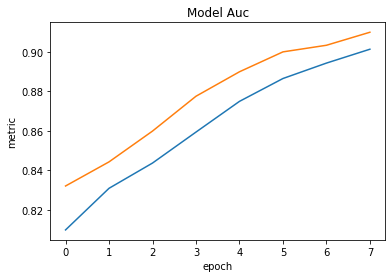

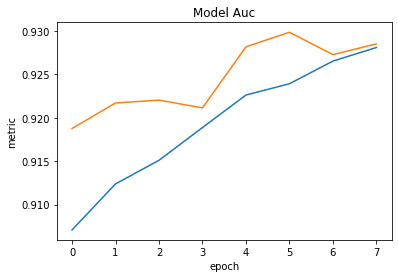

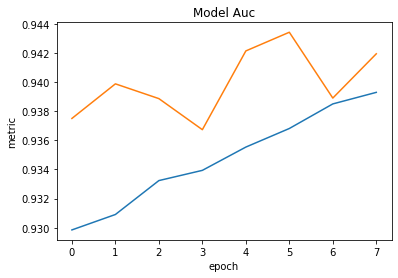

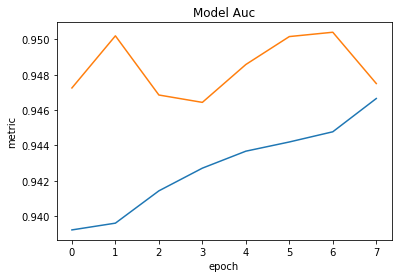

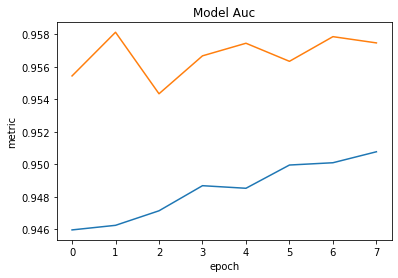

In [19]:
for history in histories:
    plotmetric(history, 'auc')

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [21]:
def plot_roc_curve(y_true, y_pred, n):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(classes.get(n))
    plt.legend()
    plt.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

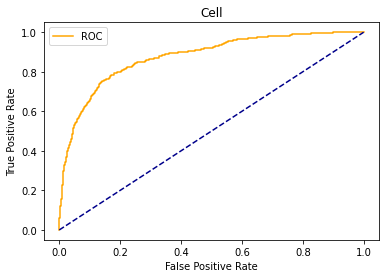

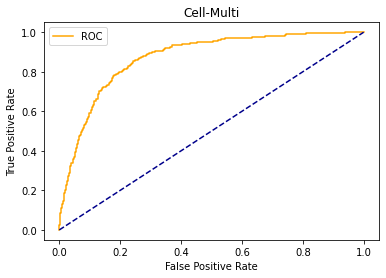

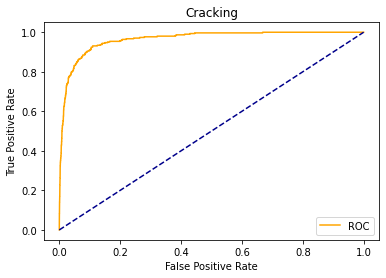

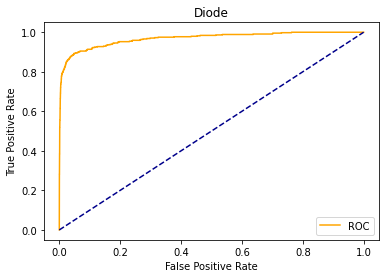

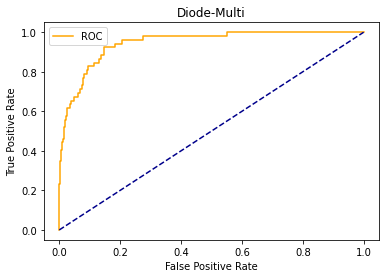

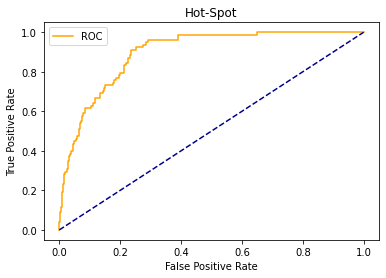

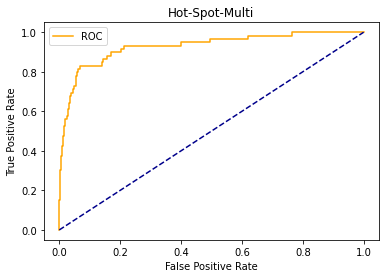

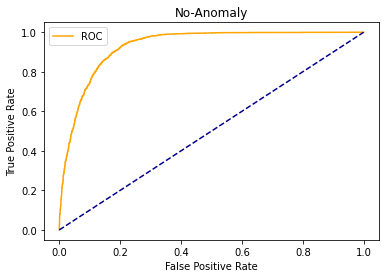

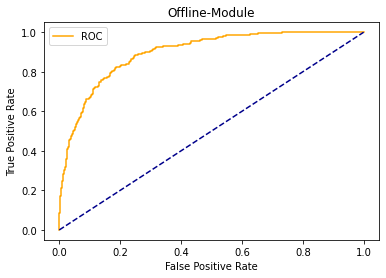

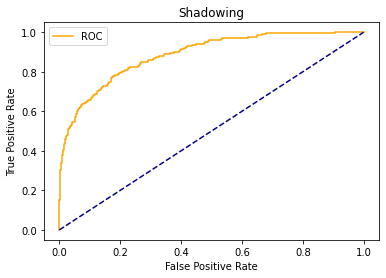

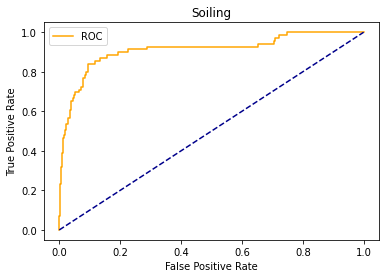

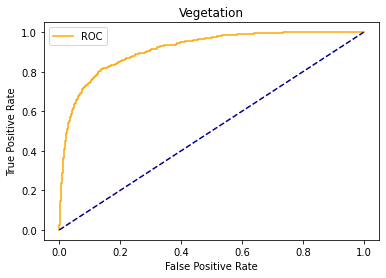

In [24]:
pred_proba = model.predict(tf.expand_dims(x_test,-1))
for n in classes.keys():
    plot_roc_curve(to_categorical(le.transform(y_test))[:,n], pred_proba[:,n], n)
    

In [25]:
y_pred = (pred_proba > 0.5)
print(classification_report(to_categorical(le.transform(y_test)),y_pred))

              precision    recall  f1-score   support

           0       0.70      0.21      0.33       591
           1       0.71      0.02      0.05       407
           2       0.72      0.53      0.61       304
           3       0.91      0.75      0.82       441
           4       1.00      0.10      0.18        52
           5       0.00      0.00      0.00        78
           6       0.67      0.03      0.06        59
           7       0.84      0.87      0.86      2934
           8       0.82      0.10      0.18       221
           9       0.90      0.22      0.35       317
          10       0.00      0.00      0.00        69
          11       0.69      0.39      0.50       498

   micro avg       0.82      0.58      0.68      5971
   macro avg       0.66      0.27      0.33      5971
weighted avg       0.79      0.58      0.62      5971
 samples avg       0.58      0.58      0.58      5971



/home/david/voila/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/voila/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
multilabel_confusion_matrix(to_categorical(le.transform(y_test)),y_pred)

array([[[5325,   55],
        [ 464,  127]],

       [[5560,    4],
        [ 397,   10]],

       [[5603,   64],
        [ 143,  161]],

       [[5498,   32],
        [ 112,  329]],

       [[5919,    0],
        [  47,    5]],

       [[5893,    0],
        [  78,    0]],

       [[5911,    1],
        [  57,    2]],

       [[2553,  484],
        [ 379, 2555]],

       [[5745,    5],
        [ 198,   23]],

       [[5646,    8],
        [ 247,   70]],

       [[5902,    0],
        [  69,    0]],

       [[5385,   88],
        [ 305,  193]]])

In [27]:
score = roc_auc_score(to_categorical(le.transform(y_test)), pred_proba, multi_class='ovo')
print(score)

0.9154106173784092


In [28]:
def predict_image_by_indx(i):
    holdout_image = X[i]
    prob = model.predict(holdout_image.reshape(1, 40, 24, 1))
    plt.imshow(holdout_image)
    pred = prob > 0.5
    print(pred[0])
    n = le.classes_[pred[0]]
    print(n)
    plt.title("Predicted: " + n[0] + "\nActual: "+y[i])

[False False False  True False False False False False False False False]
['Diode']


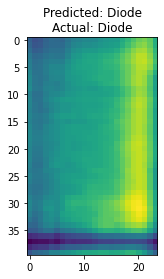

In [29]:
predict_image_by_indx(8483)

In [30]:
#!mkdir -p saved_model
model.save('saved_model/CNN_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/CNN_1/assets
